<a href="https://colab.research.google.com/github/SwarajShinde/Text-Classfication-BOW------BERT/blob/main/NLP_Sent_bow_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df = pd.read_csv("/content/drive/My Drive/imdb_movie_reviews/IMDB Dataset.csv")

# Data Understanding

In [4]:
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


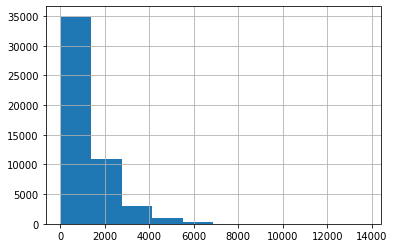

In [6]:
df['review'].str.len().hist()

In [7]:
def num_tok(txt):
    txt_f = txt.split()
    print(len(txt_f))


In [9]:
sample_ = df['review'][0]

In [12]:
len(sample_)

1761

In [11]:
num_tok(sample_)

307


In [13]:
df['review'].str.len().max()

13704

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


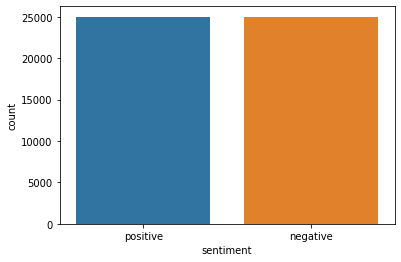

In [14]:
sns.countplot(df['sentiment'])

# NLTK Tokenizer examples

In [ ]:
import nltk
nltk.download('punkt')

In [28]:
from nltk.tokenize import word_tokenize,wordpunct_tokenize,sent_tokenize

In [19]:
ret = word_tokenize(sample_)

In [22]:
ret[:5]

['One', 'of', 'the', 'other', 'reviewers']

In [24]:
ret_p = wordpunct_tokenize(sample_)


In [27]:
len(ret_p)

377

In [29]:
sent_p = sent_tokenize(sample_)

In [30]:
sent_p

["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked.",
 'They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO.',
 'Trust me, this is not a show for the faint hearted or timid.',
 'This show pulls no punches with regards to drugs, sex or violence.',
 'Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary.',
 'It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda.',
 "Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of 

# Bag of Words

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
cv = CountVectorizer()

In [33]:
# example corpus
cv.fit(sent_p)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [34]:
corpus_transformed = cv.transform(sent_p)

In [35]:
corpus_transformed

<10x186 sparse matrix of type '<class 'numpy.int64'>'
	with 273 stored elements in Compressed Sparse Row format>

In [ ]:
print(corpus_transformed)

In [39]:
# vocab stored by count -vectorizer
print(cv.vocabulary_)

{'one': 114, 'of': 112, 'the': 157, 'other': 118, 'reviewers': 131, 'has': 70, 'mentioned': 101, 'that': 155, 'after': 2, 'watching': 174, 'just': 87, 'oz': 120, 'episode': 44, 'you': 184, 'll': 92, 'be': 15, 'hooked': 75, 'they': 159, 'are': 9, 'right': 132, 'as': 12, 'this': 161, 'is': 83, 'exactly': 46, 'what': 176, 'happened': 68, 'with': 180, 'me': 100, 'br': 19, 'first': 53, 'thing': 160, 'struck': 152, 'about': 0, 'was': 172, 'its': 86, 'brutality': 20, 'and': 7, 'unflinching': 168, 'scenes': 136, 'violence': 171, 'which': 178, 'set': 140, 'in': 77, 'from': 57, 'word': 181, 'go': 63, 'trust': 165, 'not': 111, 'show': 143, 'for': 55, 'faint': 51, 'hearted': 72, 'or': 115, 'timid': 162, 'pulls': 127, 'no': 110, 'punches': 128, 'regards': 130, 'to': 163, 'drugs': 40, 'sex': 141, 'hardcore': 69, 'classic': 29, 'use': 169, 'it': 84, 'called': 22, 'nickname': 109, 'given': 61, 'oswald': 117, 'maximum': 98, 'security': 139, 'state': 150, 'penitentary': 122, 'focuses': 54, 'mainly': 94,

In [44]:
# we can use diff tokenier , other than the CountVectorizer 
# This inclued various punctuation marks in the tokens
cvt = CountVectorizer(tokenizer=word_tokenize,token_pattern=None)
cvt.fit(sent_p)
corpus_trans_1 = cvt.transform(sent_p)


In [45]:
corpus_trans_1

<10x200 sparse matrix of type '<class 'numpy.int64'>'
	with 314 stored elements in Compressed Sparse Row format>

In [47]:
print(cvt.vocabulary_)

{'one': 129, 'of': 127, 'the': 171, 'other': 133, 'reviewers': 146, 'has': 83, 'mentioned': 115, 'that': 170, 'after': 15, 'watching': 188, 'just': 101, '1': 9, 'oz': 135, 'episode': 57, 'you': 198, "'ll": 0, 'be': 28, 'hooked': 88, '.': 4, 'they': 173, 'are': 22, 'right': 147, ',': 3, 'as': 24, 'this': 175, 'is': 97, 'exactly': 59, 'what': 190, 'happened': 81, 'with': 194, 'me.': 114, '<': 10, 'br': 32, '/': 8, '>': 11, 'first': 66, 'thing': 174, 'struck': 167, 'me': 113, 'about': 13, 'was': 186, 'its': 100, 'brutality': 33, 'and': 20, 'unflinching': 182, 'scenes': 151, 'violence': 185, 'which': 192, 'set': 155, 'in': 91, 'from': 70, 'word': 195, 'go': 76, 'trust': 179, 'not': 126, 'a': 12, 'show': 158, 'for': 68, 'faint': 64, 'hearted': 85, 'or': 130, 'timid': 176, 'pulls': 142, 'no': 125, 'punches': 143, 'regards': 145, 'to': 177, 'drugs': 53, 'sex': 156, 'hardcore': 82, 'classic': 42, 'use': 183, 'word.': 196, 'it': 98, 'called': 35, 'nickname': 124, 'given': 74, 'oswald': 132, 'ma

In [64]:
# NOw lets create sparse matrix for out dataset 
# well use Logistic REgression , Accuracy as our metric
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
import time

In [52]:
df.sentiment = df.sentiment.apply(lambda x:1 if x=='positive' else 0)

In [55]:
df['kfold'] = -1
df = df.sample(frac=1).reset_index(drop=True)

In [59]:
y=df.sentiment.values
skf = model_selection.StratifiedKFold(n_splits=5)
for num,(train_idx,val_idx) in enumerate(skf.split(X=df,y=y)):
    df.loc[val_idx,'kfold'] = num
    

In [61]:
df['kfold'].value_counts()

4    10000
3    10000
2    10000
1    10000
0    10000
Name: kfold, dtype: int64

In [66]:
# lets train the model 

for epoch in range(5):
    start=time.time()
    train = df[df['kfold']!=epoch].reset_index(drop=True)
    valid = df[df['kfold']==epoch].reset_index(drop=True)
    count_vect = CountVectorizer(tokenizer=word_tokenize,token_pattern=None)
    count_vect.fit(train.review)
    x_train = count_vect.transform(train.review)  
    x_test =  count_vect.transform(valid.review)
    model = linear_model.LogisticRegression()
    model.fit(x_train,train.sentiment)
    prediction = model.predict(x_test)
    acc = metrics.accuracy_score(valid.sentiment,prediction)
    end=time.time()
    print(f"Fold {epoch}")
    print(f'Accuracy : {acc}')
    print(f'Count Vectorizer took {end-start} time for {epoch} fold')



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold 0
Accuracy : 0.8935
Count Vectorizer took 177.35169458389282 time for 0 fold


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold 1
Accuracy : 0.8952
Count Vectorizer took 175.8921570777893 time for 1 fold


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold 2
Accuracy : 0.8902
Count Vectorizer took 176.28439044952393 time for 2 fold


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold 3
Accuracy : 0.8934
Count Vectorizer took 176.6089653968811 time for 3 fold
Fold 4
Accuracy : 0.8879
Count Vectorizer took 177.0667896270752 time for 4 fold


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
"""
LOGS : Count Vectorizer 
Fold 0
Accuracy : 0.8935
Count Vectorizer took 177.35169458389282 time for 0 fold
--------------------------------------------------------
Fold 1
Accuracy : 0.8952
Count Vectorizer took 175.8921570777893 time for 1 fold
-------------------------------------------------------
Fold 2
Accuracy : 0.8902
Count Vectorizer took 176.28439044952393 time for 2 fold
-------------------------------------------------------
Fold 3
Accuracy : 0.8934
Count Vectorizer took 176.6089653968811 time for 3 fold
-------------------------------------------------------
Fold 4
Accuracy : 0.8879
Count Vectorizer took 177.0667896270752 time for 4 fold
-------------------------------------------------------
STABLE CROSS-VAL SCORE ~~ 89%
"""

# Naive Bayes : BOW

In [68]:
from sklearn import naive_bayes


In [70]:
for epoch in range(5):
    start=time.time()
    train = df[df['kfold']!=epoch].reset_index(drop=True)
    valid = df[df['kfold']==epoch].reset_index(drop=True)
    count_vect = CountVectorizer(tokenizer=word_tokenize,token_pattern=None)
    count_vect.fit(train.review)
    x_train = count_vect.transform(train.review)  
    x_test =  count_vect.transform(valid.review)
    model = naive_bayes.MultinomialNB()
    model.fit(x_train,train.sentiment)
    prediction = model.predict(x_test)
    acc = metrics.accuracy_score(valid.sentiment,prediction)
    end=time.time()
    print(f"Fold {epoch}")
    print(f'Accuracy : {acc}')
    print(f'Count Vectorizer took {end-start} sec time for {epoch} fold')

Fold 0
Accuracy : 0.8435
Count Vectorizer took 184.76706552505493 sec time for 0 fold
Fold 1
Accuracy : 0.8468
Count Vectorizer took 186.36677408218384 sec time for 1 fold
Fold 2
Accuracy : 0.839
Count Vectorizer took 178.72682237625122 sec time for 2 fold
Fold 3
Accuracy : 0.8462
Count Vectorizer took 171.66409277915955 sec time for 3 fold
Fold 4
Accuracy : 0.8492
Count Vectorizer took 170.3415720462799 sec time for 4 fold


In [ ]:
"""
Logg:
Fold 0
Accuracy : 0.8435
Count Vectorizer took 184.76706552505493 sec time for 0 fold
Fold 1
Accuracy : 0.8468
Count Vectorizer took 186.36677408218384 sec time for 1 fold
Fold 2
Accuracy : 0.839
Count Vectorizer took 178.72682237625122 sec time for 2 fold
Fold 3
Accuracy : 0.8462
Count Vectorizer took 171.66409277915955 sec time for 3 fold
Fold 4
Accuracy : 0.8492
Count Vectorizer took 170.3415720462799 sec time for 4 fold
"""

# TFIDF

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
tfidf_ = TfidfVectorizer(tokenizer=word_tokenize,token_pattern=None)
corp = ["hello, how are you?",
"im getting bored at home. And you? What do you think?",
"did you know about counts",
"let's see if this works!",
]
tfidf_.fit(corp)
tr_tfidf = tfidf_.transform(corp)
print(tr_tfidf)

In [78]:
for fold in range(5):
    start = time.time()
    train_df = df[df['kfold'] != fold].reset_index(drop=True)
    valid_df = df[df['kfold'] == fold ].reset_index(drop=True)
    tfidf = TfidfVectorizer(tokenizer=word_tokenize,token_pattern=None)
    tfidf.fit(train_df.review)
    x_train = tfidf.transform(train_df.review)
    x_valid = tfidf.transform(valid_df.review)
    model = linear_model.LogisticRegression()
    model.fit(x_train,train_df.sentiment)
    preds = model.predict(x_valid)
    acc = metrics.accuracy_score(valid_df.sentiment,preds)
    end = time.time()
    print(f"Fold {fold} ")
    print(f"accuracy {acc}")
    print(f'Time taken by TFIDF {end-start} sec on Logistic Regression')

Fold 0 
accuracy 0.8957
Time taken by TFIDF 176.92100644111633 sec on Logistic Regression
Fold 1 
accuracy 0.8981
Time taken by TFIDF 178.90861868858337 sec on Logistic Regression
Fold 2 
accuracy 0.8928
Time taken by TFIDF 176.45494413375854 sec on Logistic Regression
Fold 3 
accuracy 0.8978
Time taken by TFIDF 178.21876549720764 sec on Logistic Regression
Fold 4 
accuracy 0.8997
Time taken by TFIDF 177.38913106918335 sec on Logistic Regression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
"""
LOGS : TFIDF
Fold 0 
accuracy 0.8957
Time taken by TFIDF 176.92100644111633 sec on Logistic Regression
Fold 1 
accuracy 0.8981
Time taken by TFIDF 178.90861868858337 sec on Logistic Regression
Fold 2 
accuracy 0.8928
Time taken by TFIDF 176.45494413375854 sec on Logistic Regression
Fold 3 
accuracy 0.8978
Time taken by TFIDF 178.21876549720764 sec on Logistic Regression
Fold 4 
accuracy 0.8997
Better than BOW duh:))
"""

# N-Grams

In [80]:
from nltk import ngrams

In [87]:
n = 2
text = 'i laugh the way you smirk'
text_tok = word_tokenize(text)
n_grams_ = list(ngrams(text_tok,n))


In [88]:
n_grams_

[('i', 'laugh'),
 ('laugh', 'the'),
 ('the', 'way'),
 ('way', 'you'),
 ('you', 'smirk')]

In [91]:
tfidf_ngrams = TfidfVectorizer(tokenizer=word_tokenize,token_pattern=None,ngram_range=(1,2))

In [92]:
train = df[df['kfold']!=1].reset_index(drop=True)
valid = df[df['kfold'] == 1].reset_index(drop=True)
tfidf_ngrams.fit(train.review)
x_train = tfidf_ngrams.transform(train.review)
x_valid = tfidf_ngrams.transform(valid.review)
model = linear_model.LogisticRegression()
model.fit(x_train,train.sentiment)
preds = model.predict(x_valid)
acc=  metrics.accuracy_score(valid.sentiment,preds)
print(f'Accuracy {acc} ')


Accuracy 0.8986 


# STEMMING AND LEMMATIZATION

In [96]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

In [97]:
train = df[df['kfold'] != 1].reset_index(drop=True)
valid = df[df['kfold'] == 1].reset_index(drop=True)
train['review'] = train['review'].apply(lambda x:stemmer.stem(x))
tfidf.fit(train.review)
x_train = tfidf.transform(train.review)
x_valid = tfidf.transform(valid.review)
model = linear_model.LogisticRegression()
model.fit(x_train,train.sentiment)
preds = model.predict(x_valid)
acc=  metrics.accuracy_score(valid.sentiment,preds)
print(f'Accuracy {acc} ')


Accuracy 0.8979 


In [99]:
# SO seems stemming doesn't improve our our bi-gram model

In [100]:
# Stemming PLus bi-gram
train = df[df['kfold'] != 1].reset_index(drop=True)
valid = df[df['kfold'] == 1].reset_index(drop=True)
train['review'] = train['review'].apply(lambda x:stemmer.stem(x))
tfidf_ngrams.fit(train.review)
x_train = tfidf_ngrams.transform(train.review)
x_valid = tfidf_ngrams.transform(valid.review)
model = linear_model.LogisticRegression()
model.fit(x_train,train.sentiment)
preds = model.predict(x_valid)
acc=  metrics.accuracy_score(valid.sentiment,preds)
print(f'Accuracy {acc} ')


Accuracy 0.8984 


Still Not able to cross 90% mark

# EMBEDDINGS 
